In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
import shapely
from shapely.geometry import Point
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import KFold

In [45]:
# Read in dataframe of all of our New York state GEDI L2A data.
# Thanks to Luke Kiernan for this particular loop.
os.chdir('/content/data')
#os.rmdir('/content/data/.ipynb_checkpoints')
allGranules = {fname : pd.read_csv(fname) for fname in os.listdir(os.getcwd())}
#for key, val in allGranules.items():
#    if val.empty:
#        del val
#        continue
#    val['rh_100'] = val['rh'].apply(lambda x : float(re.search(lastNum,x)[1]))
#    del val['rh']
#        val['granule'] = key.split('.')[0]

allData = pd.concat(item for item in allGranules.values() if not item.empty)

allData['timestamp'] = pd.to_datetime(allData2['delta_time'], unit ='s', origin = pd.Timestamp('2018-01-01 00:00'))
allData['date'] = allData['timestamp'].dt.strftime('%Y-%m-%d').astype(str)

allData['geometry'] = allData2apply(lambda row: Point(row['lon_lowestmode'], row['lat_lowestmode']), axis=1)
allData.drop(['lon_lowestmode', 'lat_lowestmode', 'delta_time'], axis=1)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 2771

In [ ]:
os.chdir('/content/data')
os.getcwd()
os.listdir(os.getcwd())


['GEDI02_A_2021251085316_O15517_03_T08756_02_003_02_V002.csv',
 'GEDI02_A_2021285195251_O16051_03_T05941_02_003_02_V002.csv',
 'GEDI02_A_2022057074143_O18167_02_T11017_02_003_02_V002.csv',
 'GEDI02_A_2022017233829_O17557_02_T10497_02_003_02_V002.csv',
 'GEDI02_A_2021235102001_O15270_02_T05861_02_003_02_V002.csv',
 'GEDI02_A_2021323043104_O16630_03_T00065_02_003_02_V002.csv',
 'GEDI02_A_2022054144204_O18125_03_T05543_02_003_04_V002.csv',
 'GEDI02_A_2021238141338_O15319_03_T03309_02_003_02_V002.csv',
 'GEDI02_A_2021354161219_O17118_03_T04686_02_003_02_V002.csv',
 'GEDI02_A_2021262050610_O15685_03_T04319_02_003_02_V002.csv',
 'GEDI02_A_2021194075534_O14633_03_T10164_02_003_02_V002.csv',
 'GEDI02_A_2021305121213_O16356_03_T08022_02_003_02_V002.csv',
 'GEDI02_A_2022060065351_O18213_02_T08921_02_003_02_V002.csv',
 'GEDI02_A_2021208202045_O14858_02_T07605_02_003_02_V002.csv',
 'GEDI02_A_2021351122005_O17069_02_T11048_02_003_02_V002.csv',
 'GEDI02_A_2022041140542_O17923_02_T08064_02_003_02_V00

In [8]:
allData.head()

,Unnamed: 0,Class,Group,beam,channel,lat_lowestmode,lon_lowestmode,elev_lowestmode,delta_time,rh,land_cover_data/landsat_water_persistence,land_cover_data/landsat_treecover,land_cover_data/region_class,land_cover_data/urban_proportion,land_cover_data/urban_focal_window_size,shot_number,timestamp,date,geometry
0,0,Woody Wetlands,Wetlands,2,1,44.991206,-74.204474,72.577194,1.087645e+08,[-3.25 -2.73 -2.32 -1.94 -1.61 -1.31 -1.04 -0....,0,100.0,7,0,3,141600200300254959,2021-06-12 20:21:32.130161920,2021-06-12,POINT (-74.20447404670432 44.99120554593688)
1,1,Woody Wetlands,Wetlands,2,1,44.988635,-74.198234,65.183770,1.087645e+08,[-2.47 -2.02 -1.64 -1.38 -1.12 -0.93 -0.74 -0....,0,98.0,7,0,3,141600200300254969,2021-06-12 20:21:32.212802048,2021-06-12,POINT (-74.19823350211973 44.98863465281226)
2,2,Deciduous Forest,Forest,2,1,44.986055,-74.191984,74.627700,1.087645e+08,[-2.06 -1.53 -1.16 -0.86 -0.59 -0.37 -0.14 0....,0,95.0,7,0,3,141600200300254979,2021-06-12 20:21:32.295441920,2021-06-12,POINT (-74.19198369625599 44.98605486065461)
3,3,Woody Wetlands,Wetlands,2,1,44.980886,-74.179485,85.624230,1.087645e+08,[-1.61 -1.23 -0.89 -0.63 -0.37 -0.14 0.07 0....,0,100.0,7,0,3,141600200300254999,2021-06-12 20:21:32.460754944,2021-06-12,POINT (-74.17948452001504 44.980885980373216)
4,4,Evergreen Forest,Forest,2,1,44.975446,-74.166383,104.685730,1.087645e+08,[-2.84 -2.43 -2.09 -1.83 -1.61 -1.42 -1.27 -1....,0,100.0,7,0,3,141600200300255019,2021-06-12 20:21:32.634321408,2021-06-12,POINT (-74.16638304077313 44.97544595702726)


In [9]:
# PRODUCE RH METRIC ARRAY
def str2np(rhstr):
    return np.fromstring(rhstr[1:-1], sep=' ')

rh = np.array([str2np(r) for r in allData['rh']])
rha = allData['rh'].array

<bound method IndexOpsMixin.to_numpy of 0      [-1.94 -1.87 -1.83 -1.76 -1.68 -1.61 -1.57 -1....
1      [-2.13 -2.06 -1.98 -1.91 -1.83 -1.76 -1.68 -1....
2      [-1.94 -1.91 -1.83 -1.76 -1.72 -1.64 -1.61 -1....
3      [-2.02 -1.98 -1.91 -1.83 -1.76 -1.72 -1.64 -1....
4      [-1.91 -1.87 -1.79 -1.76 -1.68 -1.64 -1.57 -1....
                             ...                        
441    [-5.35 -4.34 -3.7  -3.33 -3.03 -2.77 -2.58 -2....
442    [-12.58 -10.67  -8.91  -6.36  -2.95  -0.78   0...
443    [-4.75 -4.23 -3.78 -3.36 -3.03 -2.73 -2.47 -2....
444    [-5.24 -4.45 -3.63 -2.73 -1.87 -1.19 -0.67 -0....
445    [-1.42 -0.74 -0.11  0.48  1.16  1.9   2.8   3....
Name: rh, Length: 740565, dtype: object>

In [ ]:
rha

<PandasArray>
[                                                                                                       '[-1.94 -1.87 -1.83 -1.76 -1.68 -1.61 -1.57 -1.49 -1.46 -1.42 -1.34 -1.31\n -1.27 -1.19 -1.16 -1.12 -1.08 -1.04 -1.01 -0.97 -0.89 -0.86 -0.82 -0.78\n -0.74 -0.71 -0.67 -0.63 -0.59 -0.56 -0.56 -0.52 -0.48 -0.44 -0.41 -0.37\n -0.33 -0.29 -0.26 -0.22 -0.18 -0.14 -0.14 -0.11 -0.07 -0.03  0.    0.03\n  0.07  0.11  0.14  0.14  0.18  0.22  0.26  0.29  0.33  0.37  0.41  0.44\n  0.48  0.52  0.56  0.59  0.63  0.67  0.71  0.74  0.78  0.82  0.86  0.89\n  0.93  0.97  1.01  1.04  1.08  1.16  1.19  1.23  1.27  1.34  1.38  1.42\n  1.49  1.53  1.61  1.64  1.72  1.79  1.87  1.94  2.02  2.09  2.17  2.24\n  2.35  2.47  2.58  2.73  2.88]',
                                                                                                        '[-2.13 -2.06 -1.98 -1.91 -1.83 -1.76 -1.68 -1.64 -1.57 -1.49 -1.46 -1.42\n -1.34 -1.31 -1.27 -1.19 -1.16 -1.12 -1.08 -1.04 -1.01 -0.97 -0.89 -0.86\n -

In [10]:
# Just choose every 10 for now.
# THERE HAS TO BE SOME MORE EFFICIENT WAY TO DO THIS, MAYBE USING pd.concat?

col_names = [('rh_' + str(i)) for i in range(0,101,10)]

i = 0
for col in col_names:

    allData[col] = rh[:,i]

    i = i + 10

In [ ]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85031 entries, 0 to 156
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 85031 non-null  int64         
 1   Class                                      85031 non-null  object        
 2   Group                                      85031 non-null  object        
 3   beam                                       85031 non-null  int64         
 4   channel                                    85031 non-null  int64         
 5   lat_lowestmode                             85031 non-null  float64       
 6   lon_lowestmode                             85031 non-null  float64       
 7   elev_lowestmode                            85031 non-null  float64       
 8   delta_time                                 85031 non-null  float64       
 9   rh                      

In [11]:
# Add an additional column assigning numbers to each of the classes, to ease model training.
allData['Class_num'] = 0

#Open Water == 0 -- assign the rest
allData.loc[allData.Class=='Developed Open Space', 'Class_num'] = 1
allData.loc[allData.Class=='Developed Low Intensity', 'Class_num'] = 2
allData.loc[allData.Class=='Developed Medium Intensity', 'Class_num'] = 3
allData.loc[allData.Class=='Developed High Intensity', 'Class_num'] = 4
allData.loc[allData.Class=='Barren Land (Rock/Sand/Clay)', 'Class_num'] = 5
allData.loc[allData.Class=='Deciduous Forest', 'Class_num'] = 6
allData.loc[allData.Class=='Evergreen Forest', 'Class_num'] = 7
allData.loc[allData.Class=='Mixed Forest', 'Class_num'] = 8
allData.loc[allData.Class=='Grassland/Herbaceous', 'Class_num'] = 9
allData.loc[allData.Class=='Shrub/Scrub', 'Class_num'] = 10
allData.loc[allData.Class=='Pasture/Hay', 'Class_num'] = 11
allData.loc[allData.Class=='Cultivated Crops', 'Class_num'] = 12
allData.loc[allData.Class=='Woody Wetlands', 'Class_num'] = 13
allData.loc[allData.Class=='Emergent Herbaceous Wetlands', 'Class_num'] = 14


In [ ]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85031 entries, 0 to 156
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 85031 non-null  int64         
 1   Class                                      85031 non-null  object        
 2   Group                                      85031 non-null  object        
 3   beam                                       85031 non-null  int64         
 4   channel                                    85031 non-null  int64         
 5   lat_lowestmode                             85031 non-null  float64       
 6   lon_lowestmode                             85031 non-null  float64       
 7   elev_lowestmode                            85031 non-null  float64       
 8   delta_time                                 85031 non-null  float64       
 9   rh                      

In [12]:
# Add one more column for each different Group for model training.
allData['Group_num'] = 0

#Water == 0 -- assign the rest
allData.loc[allData.Group=='Developed', 'Group_num'] = 1
allData.loc[allData.Group=='Barren', 'Group_num'] = 2
allData.loc[allData.Group=='Forest', 'Group_num'] = 3
allData.loc[allData.Group=='Scrubland', 'Group_num'] = 4
allData.loc[allData.Group=='Planted/Cultivated', 'Group_num'] = 5
allData.loc[allData.Group=='Wetlands', 'Group_num'] = 6
allData.loc[allData.Group=='Not Classified', 'Group_num'] = 7


In [13]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2319 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 2319 non-null   int64         
 1   Class                                      2319 non-null   object        
 2   Group                                      2319 non-null   object        
 3   beam                                       2319 non-null   int64         
 4   channel                                    2319 non-null   int64         
 5   lat_lowestmode                             2319 non-null   float64       
 6   lon_lowestmode                             2319 non-null   float64       
 7   elev_lowestmode                            2319 non-null   float64       
 8   delta_time                                 2319 non-null   float64       
 9   rh                        

In [14]:
# One simpler, four-class idea: Developed, Barren, Vegetated, or Not Classified.
allData['Veg_Class'] = 0

#Developed == 0 -- assign the rest
allData.loc[allData.Group=='Barren', 'Group_num'] = 1
allData.loc[allData.Group=='Forest', 'Group_num'] = 2
allData.loc[allData.Group=='Scrubland', 'Group_num'] = 2
allData.loc[allData.Group=='Planted/Cultivated', 'Group_num'] = 2
allData.loc[allData.Group=='Wetlands', 'Group_num'] = 2
allData.loc[allData.Group=='Not Classified', 'Group_num'] = 3

In [ ]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85031 entries, 0 to 156
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 85031 non-null  int64         
 1   Class                                      85031 non-null  object        
 2   Group                                      85031 non-null  object        
 3   beam                                       85031 non-null  int64         
 4   channel                                    85031 non-null  int64         
 5   lat_lowestmode                             85031 non-null  float64       
 6   lon_lowestmode                             85031 non-null  float64       
 7   elev_lowestmode                            85031 non-null  float64       
 8   delta_time                                 85031 non-null  float64       
 9   rh                      

## Let's try an LDA model, trying to predict Class/Group from the various rh features.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

In [43]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
allData_train, allData_test = train_test_split(allData.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1)

In [17]:
features = allData_train.iloc[:, 19:30]
features
## Noah, I first just took 1 column for simplicity/testing. To get all the relevant rh columns, do features = allData_train.iloc[:, 19:30]

,rh_0,rh_10,rh_20,rh_30,rh_40,rh_50,rh_60,rh_70,rh_80,rh_90,rh_100
633,-4.98,-2.58,-1.68,-1.12,-0.67,-0.26,0.11,0.52,0.97,1.57,3.67
385,-2.43,3.89,7.67,10.48,12.69,14.68,16.22,17.49,18.76,20.19,23.26
849,-3.48,-2.06,-1.38,-0.93,-0.52,-0.14,0.18,0.56,1.01,1.57,3.07
429,-4.30,-1.57,-0.48,0.41,1.53,5.05,8.09,10.89,13.22,15.13,18.31
591,-1.79,4.64,9.89,12.36,14.31,15.77,16.97,18.16,19.55,21.24,25.28
...,...,...,...,...,...,...,...,...,...,...,...
260,-5.35,-2.58,-1.49,-0.86,-0.33,0.11,0.59,1.12,1.76,2.73,7.49
1267,-5.58,-2.17,-1.27,-0.63,-0.11,0.37,0.97,1.72,3.29,7.56,13.82
879,-3.59,-1.49,-0.71,-0.11,0.48,1.23,2.73,5.54,8.46,12.81,18.88
235,-2.99,-0.93,-0.07,0.78,2.58,11.95,14.53,16.70,18.54,20.15,22.74


In [18]:
allData_train["Group_num"]

633     2
385     2
849     0
429     2
591     2
       ..
260     2
1267    2
879     1
235     2
459     2
Name: Group_num, Length: 2087, dtype: int64

In [ ]:
n_splits=5
kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=216)

In [26]:
## Make the model object (nomenclature changed with import above)
#LDA = LinearDiscriminantAnalysis()

## Fit the object
#LDA.fit(allData_train.iloc[:, 19:30], allData_train["Group_num"])


In [ ]:
## Noah, the LDA was fitted in the cell above. After this is a hodgepodge of stuff, most of which is probably not relevant

In [ ]:
LDA.predict_proba(allData_train.iloc[:, 19:30])

array([[2.26492634e-01, 1.46782458e-01, 6.23088674e-01, 3.63623434e-03],
       [5.05462119e-02, 1.36104271e-01, 8.12823778e-01, 5.25738963e-04],
       [5.71499379e-02, 8.84361745e-02, 8.53251771e-01, 1.16211676e-03],
       ...,
       [9.89150966e-02, 1.49225641e-01, 7.50604504e-01, 1.25475792e-03],
       [2.72496107e-01, 1.41818804e-01, 5.81130277e-01, 4.55481222e-03],
       [3.87645677e-03, 6.41555774e-02, 9.31913320e-01, 5.46453706e-05]])

In [19]:
classweight = 'balanced'
maxdepth = None
minsamplessplit = 2
minsamplesleaf = 1
maxleafnodes = None

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [39]:
#Thanks to Yashbir Singh, PhD for this tutorial code pattern

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
pred_test_full = 0
cv_score = []
pr_score = []
re_score = []
au_score = []
i = 1

for train_index, test_index in kf.split(allData.iloc[:, 19:30], allData["Group_num"]):
    xtr, xvl = allData.iloc[train_index, 19:30], allData.iloc[test_index, 19:30]
    ytr, yvl = allData.iloc[train_index, 31], allData.iloc[test_index, 31]
    lda = LDA()
    xtr_lda = lda.fit_transform(xtr, ytr)
    xvl_lda = lda.transform(xvl)

    model = tree.DecisionTreeClassifier(class_weight=classweight, max_depth=maxdepth, min_samples_split=minsamplessplit, min_samples_leaf=minsamplesleaf, max_leaf_nodes=maxleafnodes)

    model.fit(xtr_lda, ytr)
    score = metrics.accuracy_score(yvl, model.predict(xvl_lda))
    score1 = metrics.precision_score(yvl, model.predict(xvl_lda), average='micro') #average parameter changes with multiclass
    score2 = metrics.recall_score(yvl, model.predict(xvl_lda), average='micro')
    #score3 = metrics.roc_auc_score(yvl, model.predict(xvl_lda), multi_class='ovr'), choose OVO vs. OVR, axis OOB error too

    print('Fold:', i)
    print('Accuracy score:', score)
    print('Precision score:', score1)
    print('Recall score:', score2)
    #print('AUC score:', score3)
    print('-------------')

    cv_score.append(score)
    pr_score.append(score1)
    re_score.append(score2)
    #au_score.append(score3)

    i+=1

Fold: 1
Accuracy score: 0.7650862068965517
Precision score: 0.7650862068965517
Recall score: 0.7650862068965517
-------------
Fold: 2
Accuracy score: 0.7823275862068966
Precision score: 0.7823275862068966
Recall score: 0.7823275862068966
-------------
Fold: 3
Accuracy score: 0.7758620689655172
Precision score: 0.7758620689655172
Recall score: 0.7758620689655172
-------------
Fold: 4
Accuracy score: 0.7478448275862069
Precision score: 0.7478448275862069
Recall score: 0.7478448275862069
-------------
Fold: 5
Accuracy score: 0.8185745140388769
Precision score: 0.8185745140388769
Recall score: 0.8185745140388769
-------------


In [40]:
print('\nMean Accuracy', np.mean(cv_score))
print('\nMean Precision', np.mean(pr_score))
print('\nMean Recall', np.mean(re_score))
#print('\nMean Auc', np.mean(au_score))

print('\nMedian Accuracy', np.median(cv_score))
print('\nMedian Precision', np.median(pr_score))
print('\nMedian Recall', np.median(re_score))
#print('\nMedian Auc', np.median(au_score))


Mean Accuracy 0.7779390407388099

Mean Precision 0.7779390407388099

Mean Recall 0.7779390407388099

Median Accuracy 0.7758620689655172

Median Precision 0.7758620689655172

Median Recall 0.7758620689655172


In [41]:
lda = LDA()
X_filtered_lda = lda.fit_transform(allData.iloc[:, 19:30], allData["Group_num"])
#X_test_filtered_lda = lda.transform(X_test_filtered) #load more data as test set

In [42]:
#model = tree.DecisionTreeClassifier(class_weight=classweight, max_depth=maxdepth, min_samples_split=minsamplessplit, min_samples_leaf=minsamplesleaf, max_leaf_nodes=maxleafnodes)

#model.fit(allData.iloc[:, 19:30], allData["Group_num"])
#score = metrics.accuracy_score(Y_test, model.predict(X_test_filtered_lda))
#score1 = metrics.precision_score(Y_test, model.predict(X_test_filtered_lda), average='micro')
#score2 = metrics.recall_score(Y_test, model.predict(X_test_filtered_lda), average='micro')
#score3 = metrics.roc_auc_score(Y_test, model.predict(X_test_filtered_lda))
#print('Accuracy score:', score)
#print('Precision score:', score1)
#print('Recall score:', score2)
#print('AUC score:', score3)

#ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
#print('Test Set Confusion Matrix:')
#print(confusion_matrix(Y_test, model.predict(X_test_filtered_lda)))
#print('Train Set Confusion Matrix:')
#print(confusion_matrix(allData["Group_num"], model.predict(X_filtered_lda)))

Train Set Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 11 features as input.

In [ ]:
y_pred_proba = model.predict(X_test_filtered_lda)

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Score = "+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Radiomics + TDA')
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle = '--', lw = 2, color = 'black')

plt.show()

In [ ]:
X_train.loc[y_train==0].petal_length

In [ ]:
features.loc[allData_train["Group_num"]==0]

,rh_0,rh_10,rh_20,rh_30,rh_40,rh_50,rh_60,rh_70,rh_80,rh_90,rh_100
35,-3.89,-2.17,-1.46,-0.93,-0.52,-0.14,0.26,0.63,1.12,1.72,3.55
2690,-5.90,-2.43,-1.60,-1.04,-0.59,-0.22,0.14,0.56,0.97,1.60,3.96
137,-2.43,-1.72,-1.23,-0.82,-0.44,-0.11,0.18,0.56,0.93,1.42,2.43
2057,-1.90,-1.38,-0.97,-0.63,-0.29,0.00,0.29,0.59,0.97,1.42,2.24
2687,-5.68,-2.43,-1.60,-1.04,-0.59,-0.22,0.14,0.52,0.97,1.57,3.88
...,...,...,...,...,...,...,...,...,...,...,...
13,-2.24,-1.57,-1.08,-0.63,-0.22,0.14,0.56,0.97,1.45,2.05,3.14
622,-1.01,-0.74,-0.48,-0.26,-0.03,0.22,0.44,0.71,1.01,1.34,1.83
1565,-1.53,-1.16,-0.82,-0.52,-0.26,0.00,0.29,0.56,0.89,1.27,1.90
485,-4.19,-2.13,-1.42,-0.89,-0.48,-0.11,0.26,0.67,1.12,1.72,3.74


In [ ]:
## First we estimate the means of the three normal distributions
mu_0_hat = np.mean(features.loc[allData_train["Group_num"]==0])
mu_1_hat = np.mean(features.loc[allData_train["Group_num"]==1])
mu_2_hat = np.mean(features.loc[allData_train["Group_num"]==2])
mu_3_hat = np.mean(features.loc[allData_train["Group_num"]==3])
mu_4_hat = np.mean(features.loc[allData_train["Group_num"]==4])
mu_5_hat = np.mean(features.loc[allData_train["Group_num"]==5])
mu_6_hat = np.mean(features.loc[allData_train["Group_num"]==6])
mu_7_hat = np.mean(features.loc[allData_train["Group_num"]==7])

## Then the common variance

#sigma_hat_sq = np.sum(np.power(X_train.loc[y_train==0].petal_length - mu_0_hat,2))


sigma_hat_sq = np.sum(np.power(features.loc[allData_train["Group_num"]==0] - mu_0_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==1] - mu_1_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==2] - mu_2_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==3] - mu_3_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==4] - mu_4_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==5] - mu_5_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==6] - mu_6_hat,2))
sigma_hat_sq = sigma_hat_sq + np.sum(np.power(features.loc[allData_train["Group_num"]==7] - mu_7_hat,2))
sigma_hat_sq = sigma_hat_sq/(len(allData_train["Group_num"])-3)

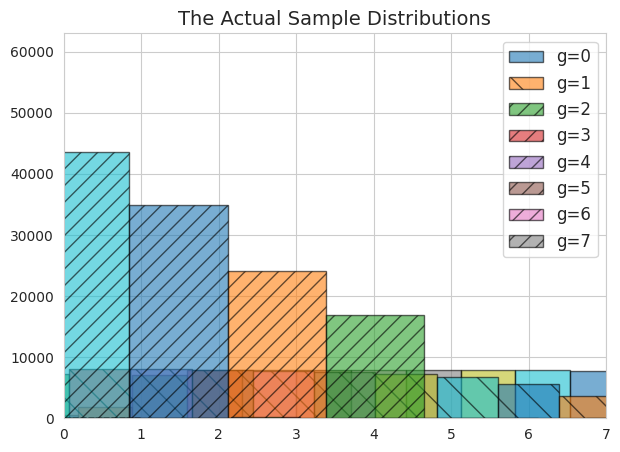

In [ ]:
## Plot the sample distributions
plt.figure(figsize=(7,5))

plt.hist(features.loc[allData_train["Group_num"]==0],alpha=.6,
         label="g=0",
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==1],alpha=.6,
         label="g=1",
         hatch = "\\",
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==2],alpha=.6,
         label="g=2",
         hatch='//',
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==3],alpha=.6,
         label="g=3",
         hatch='//',
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==4],alpha=.6,
         label="g=4",
         hatch='//',
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==5],alpha=.6,
         label="g=5",
         hatch='//',
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==6],alpha=.6,
         label="g=6",
         hatch='//',
         edgecolor="black")
plt.hist(features.loc[allData_train["Group_num"]==7],alpha=.6,
         label="g=7",
         hatch='//',
         edgecolor="black")

plt.legend(fontsize=12)
plt.title("The Actual Sample Distributions", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlim(0,7)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
l2a_train, l2a_test = train_test_split(allData.copy(),
                                            test_size=.2,
                                            random_state=514,
                                            shuffle=True)

In [ ]:
n_splits = 5

kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=514)

In [ ]:
ks = range(1, 56)
features = ['rh_0', 'rh_10', 'rh_20', 'rh_30', 'rh_40', 'rh_50', 'rh_60', 'rh_70', 'rh_80', 'rh_90', 'rh_100']

k_all_accs = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(l2a_train, l2a_train.Class_num):
    l2a_tt = l2a_train.iloc[train_index]
    l2a_ho = l2a_train.iloc[test_index]

    j = 0
    for k in ks:
        print(k)
        knn = Pipeline([('scale', StandardScaler()),('knn_cls', KNeighborsClassifier(k))])

        knn.fit(l2a_tt[features].values,
                   l2a_tt.Class_num.values)

        pred = knn.predict(l2a_ho[features].values)

        k_all_accs[i,j] = accuracy_score(l2a_ho.Class_num.values, pred)

        j = j + 1
    i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


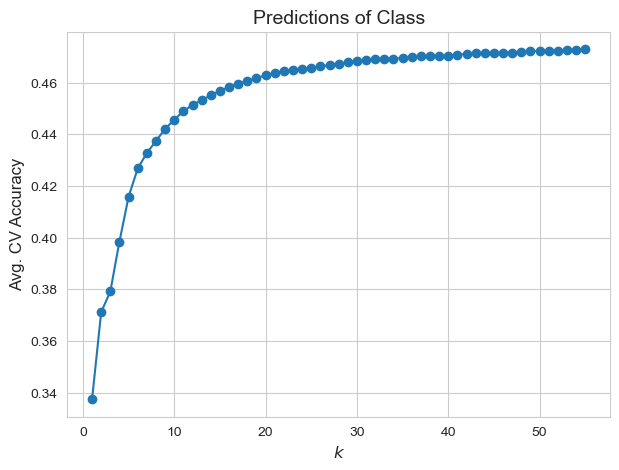

In [ ]:
plt.figure(figsize=(7,5))


plt.plot(ks,
         np.mean(k_all_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Predictions of Class', fontsize=14)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

## There are many different Class names, and much fewer Group. Let's see how a kNN model performs when using Group at the predicted feature instead. Again, use the rh metrics.

In [ ]:
ks = range(1, 56)
features = ['rh_0', 'rh_10', 'rh_20', 'rh_30', 'rh_40', 'rh_50', 'rh_60', 'rh_70', 'rh_80', 'rh_90', 'rh_100']

k_all_accs_group = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(l2a_train, l2a_train.Group_num):
    l2a_tt = l2a_train.iloc[train_index]
    l2a_ho = l2a_train.iloc[test_index]

    j = 0
    for k in ks:
        print(k)
        knn = Pipeline([('scale', StandardScaler()),('knn_cls', KNeighborsClassifier(k))])

        knn.fit(l2a_tt[features].values,
                   l2a_tt.Group_num.values)

        pred = knn.predict(l2a_ho[features].values)

        k_all_accs_group[i,j] = accuracy_score(l2a_ho.Group_num.values, pred)

        j = j + 1
    i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


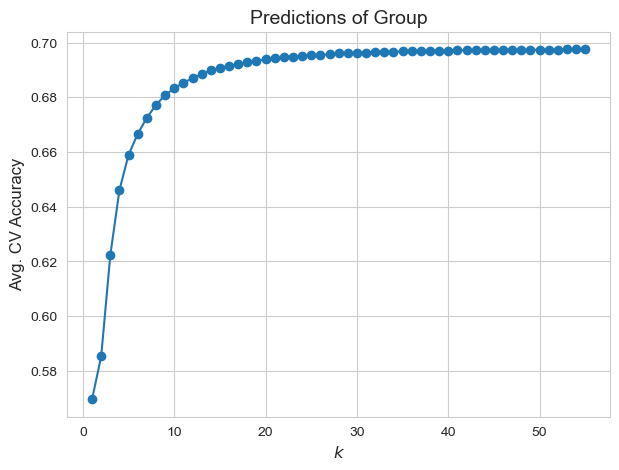

In [ ]:
plt.figure(figsize=(7,5))


plt.plot(ks,
         np.mean(k_all_accs_group, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Predictions of Group', fontsize=14)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

In [ ]:
# One more with only four Group labels instead of eight (see groupings above), 'Veg_Class'.
ks = range(1, 30)
features = ['rh_0', 'rh_10', 'rh_20', 'rh_30', 'rh_40', 'rh_50', 'rh_60', 'rh_70', 'rh_80', 'rh_90', 'rh_100']

k_all_accs_veg = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(l2a_train, l2a_train.Veg_Class):
    l2a_tt = l2a_train.iloc[train_index]
    l2a_ho = l2a_train.iloc[test_index]

    j = 0
    for k in ks:
        print(k)
        knn = Pipeline([('scale', StandardScaler()),('knn_cls', KNeighborsClassifier(k))])

        knn.fit(l2a_tt[features].values,
                   l2a_tt.Veg_Class.values)

        pred = knn.predict(l2a_ho[features].values)

        k_all_accs_veg[i,j] = accuracy_score(l2a_ho.Veg_Class.values, pred)

        j = j + 1
    i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


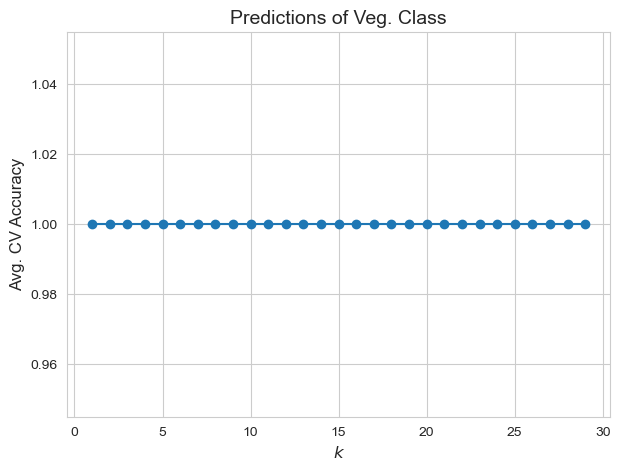

In [ ]:
plt.figure(figsize=(7,5))


plt.plot(ks,
         np.mean(k_all_accs_veg, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Predictions of Veg. Class', fontsize=14)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()